In [57]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [58]:
# Fetch dataset from UCI Machine Learning Repository
wine_quality = fetch_ucirepo(id=186)

# Extract data and targets
X = wine_quality.data.features
y = wine_quality.data.targets

# Display metadata and variable information
print(wine_quality.metadata)
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [59]:
df = pd.concat([X, y], axis=1)
df.rename(columns={df.columns[-1]: 'quality'}, inplace=True)
    

In [60]:
# Display dataset information and visualizations
def wine_data(df):
    print("Dataset Shape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nFirst few rows:")
    print(df.head())
    print("\nBasic Statistics:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

wine_data(df)

Dataset Shape: (6497, 12)

Columns: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

First few rows:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

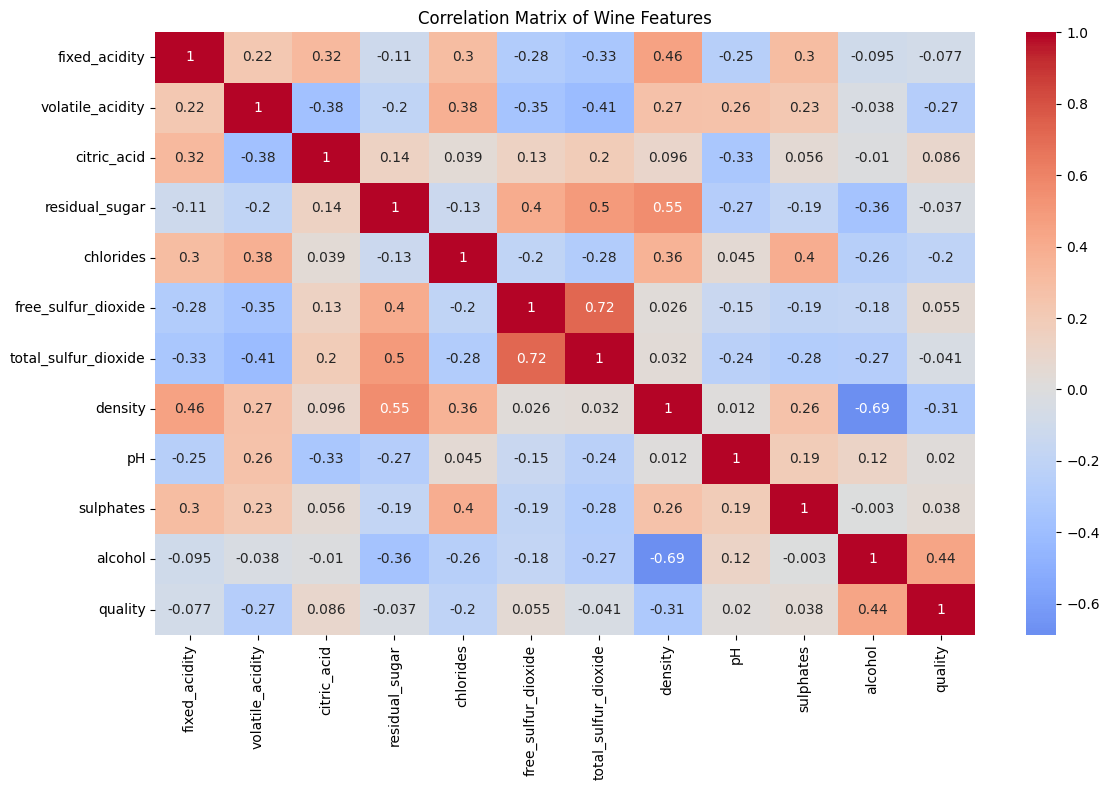

In [61]:
 # Correlation matrix visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Wine Features')
plt.tight_layout()
plt.show()

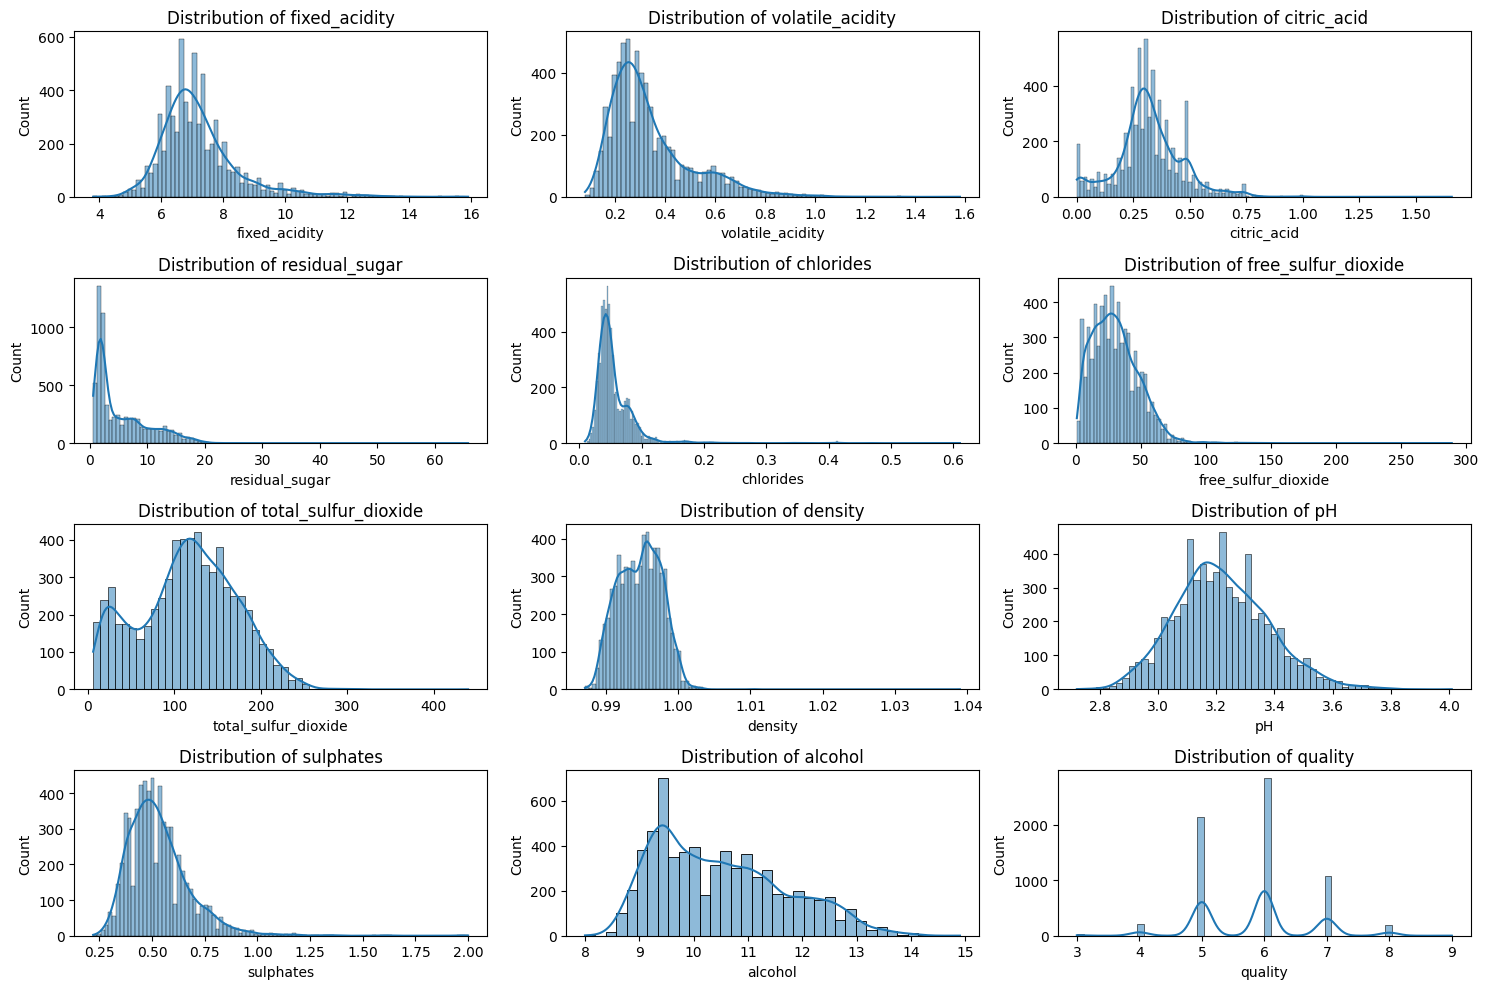

In [62]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [63]:
# Perform regression to predict wine quality
def linear_regression_analysis(df):
    # Select features and target
    X = df.drop('quality', axis=1)
    y = df['quality']

# Splitting data

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (5197, 11)
Test set shape: (1300, 11)


# Training the model


In [65]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predicting and evaluating

In [66]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

Mean Squared Error on Test Data: 0.546696441959444


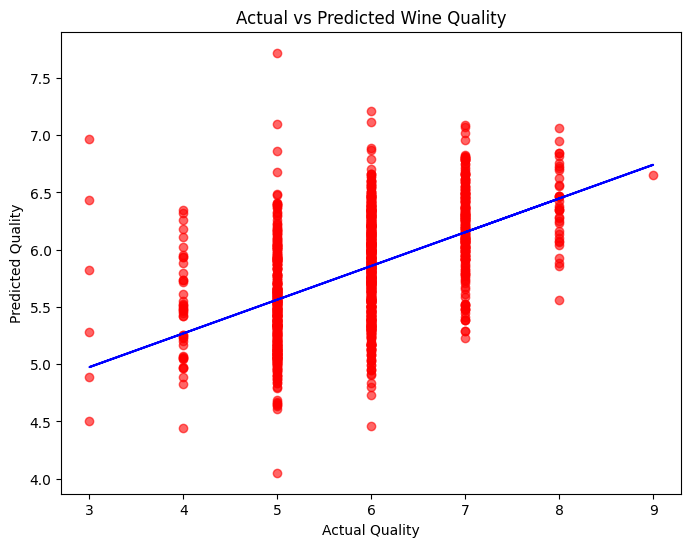

In [70]:
# Plot predictions vs actual values with trend line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='red')

    # Plot the trend line
y_test_array = np.array(y_test).reshape(-1)
y_pred_array = np.array(y_pred).reshape(-1)
z = np.polyfit(y_test_array, y_pred_array, 1)
p = np.poly1d(z)
plt.plot(y_test_array, p(y_test_array), color='blue')

plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.show()

In [71]:
linear_regression_analysis(df)